Импорт необходиых библиотек и загрузка данных

In [129]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data_lables =pd.read_csv('output1.csv')
data =pd.read_csv('input1.csv')

In [77]:
data.tail()

,1.93E+00,1.93E+00.1,1.93E+00.2,1.93E+00.3,1.93E+00.4,1.93E+00.5,1.93E+00.6,4.56E-01,2.53E-01,2.04E-01,...,3.11E-03.1,5.71E-02,5.03E-02,-5.70E-02,9.80E-03,3.88E-02,6.76E-02,-3.29E-02,3.82E-03,-2.96E-02
99994,163.0,1.0,1.0,0.718,0.642,-0.897,0.792,0.397,0.256,0.151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,163.0,1.0,1.0,0.718,0.660,-0.897,0.811,0.397,0.256,0.151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,163.0,1.0,1.0,0.718,0.660,-0.897,0.811,0.397,0.256,0.151,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,163.0,1.0,1.0,0.744,0.660,-0.897,0.830,0.397,0.255,0.152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,163.0,1.0,1.0,0.744,0.660,-0.897,0.830,0.397,0.255,0.152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Тренировка дефолтного RFC

In [10]:
clf0 = RFC()
cv = KFold(n_splits=3)
score3 = cross_val_score(clf0, data, data_lables[data_lables.columns[0]], cv=cv)

In [11]:
print(score3)

[ 0.44850449  0.30687307  0.3297033 ]


Отброс признаков через корелляцию

In [57]:
cr  = data.corr()

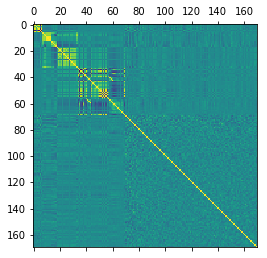

In [56]:
plt.matshow(cr)
plt.show()

In [72]:
cr  = cr - np.diag(np.diag(cr))

In [91]:
s = set()
arr1,arr2 = np.where(np.abs(cr.values) > 0.75)
uniq = np.unique(arr1)

In [102]:
for i in range(len(arr1)):
    if arr1[i] >=0:
        temp_arr = np.where(arr2 == arr1[i])
        for j in temp_arr:
            arr1[j] = -1

In [109]:
excess_columns = data.columns[np.unique(arr2 [arr1 < 0])]

In [122]:
data1 = data.drop(excess_columns, axis = 1)

In [111]:
data1.tail()

,1.93E+00,1.93E+00.2,1.93E+00.3,1.93E+00.6,4.56E-01,2.04E-01,2.01E-01,1.40E-01,9.37E-01,5.24E-01,...,3.11E-03.1,5.71E-02,5.03E-02,-5.70E-02,9.80E-03,3.88E-02,6.76E-02,-3.29E-02,3.82E-03,-2.96E-02
99994,163.0,1.0,0.718,0.792,0.397,0.151,0.222,0.700,1.19,1.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99995,163.0,1.0,0.718,0.811,0.397,0.151,0.222,0.700,1.19,1.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,163.0,1.0,0.718,0.811,0.397,0.151,0.222,0.700,1.19,1.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,163.0,1.0,0.744,0.830,0.397,0.152,0.222,0.705,1.19,1.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,163.0,1.0,0.744,0.830,0.397,0.152,0.222,0.705,1.19,1.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Проверяем деревья на новых признаках

In [113]:
score_ = cross_val_score(clf3, data1, data_lables[data_lables.columns[0]], cv=cv)
print(score_)

[ 0.4704947   0.30084301  0.29223292]


В среднем не поменялось. Попробуем отбросить еще признаки

In [123]:
data2 = data1

In [128]:
old = -1
new = cross_val_score(clf3, data2, data_lables[data_lables.columns[0]], cv=cv).mean()
data_temp = data2
while old <= new:
    old = new
    print(old, end = ' ')
    data2 = data_temp
    clf3.fit(data2, data_lables[data_lables.columns[0]])
    for i in np.argsort(clf3.feature_importances_):
        bad = i
        if clf3.feature_importances_[i] > 2/len(clf3.feature_importances_):
            break
        data_temp = data2.drop(data2.columns[bad], axis = 1)
        new = cross_val_score(clf3, data_temp, data_lables[data_lables.columns[0]], cv=cv).mean()
        if old < new:
            print(data2.columns[bad] +" : "+ str(i))
            data2 = data_temp
            break

0.349913499135 0.00E+00.12 : 23
0.350903509035 0.00E+00.14 : 24
0.378823788238 1.10E-01 : 87
0.381803818038 

Поиск через гридсеарч

In [143]:
parameters = {'max_depth':np.linspace(2,20,10).astype(int)}
rfc =RFC(n_estimators=100) 
clf = GridSearchCV(rfc, parameters, cv=cv)

In [144]:
clf.fit(data2, data_lables[data_lables.columns[0]])

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [145]:
clf.cv_results_

{'mean_fit_time': array([  26.63533966,   46.45368338,   67.98136497,   87.49435925,
         105.29204106,  118.8380475 ,  129.09089041,  135.49271941,
         140.27538856,  144.153723  ]),
 'mean_score_time': array([ 1.23266498,  1.37100577,  1.50700037,  1.59633271,  1.75933496,
         1.88569347,  1.94267241,  1.96233479,  2.01200589,  2.02066795]),
 'mean_test_score': array([ 0.35451355,  0.37132371,  0.39199392,  0.38206382,  0.3704237 ,
         0.37447374,  0.38653387,  0.39197392,  0.38484385,  0.37204372]),
 'mean_train_score': array([ 0.60256103,  0.77368774,  0.88338383,  0.95343453,  0.99184492,
         0.99839498,  0.99964   ,  0.999735  ,  0.99978   ,  0.999805  ]),
 'param_max_depth': masked_array(data = [2 4 6 8 10 12 14 16 18 20],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'params': [{'max_depth': 2},
  {'max_depth': 4},
  {'max_depth': 6},
  {'max_depth': 8},
  {'max_depth': 10},
  {'max_depth': 

In [148]:
clf_16depth = RFC(max_depth= 16,n_estimators=1000)
score_16 = cross_val_score(clf_16depth, data2, data_lables[data_lables.columns[0]], cv=cv)
print(score_16)

[ 0.51363514  0.33762338  0.31917319]


Лучший получившийся классификатор:

In [150]:
clf_16depth = RFC(max_depth= 16,n_estimators=5000)

In [152]:
from sklearn.model_selection import train_test_split
tr_X,  te_X, tr_y,  te_y, = train_test_split(data2, data_lables[data_lables.columns[0]], test_size=0.33, shuffle=False)

In [153]:
clf_16depth.fit(tr_X, tr_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [155]:
from sklearn.metrics import f1_score
pred = clf_16depth.predict(te_X)

In [159]:
f1_score(te_y,pred,average='micro')

0.31627272727272726